<a href="https://colab.research.google.com/github/Saliyan-moksh081/ML_Email_Classifier_Using_TfidfVectorizer/blob/master/Multi_Email_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as py

In [2]:
#read the csv file
email_data = pd.read_csv("/content/combined_data.csv")

In [3]:
#preview the data set
email_data.head()



,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
#check for duplicates
email_data.isnull().sum()
#check for unique values
email_data.nunique()

#check for details
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
email_data.duplicated().sum()
email_data.shape

(83448, 2)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [7]:
#vectorizer will remove some aommon words like a , is , the and keep only main imp words
trdf = TfidfVectorizer(stop_words = 'english', lowercase= True)

In [8]:
#ge t the columsn

email_data.columns

x = email_data['text']
y = email_data['label'] #target variable of my project!

In [9]:
#fitting the data into vectorizer

X_trdf = trdf.fit_transform(x)


In [10]:
print(X_trdf.shape)
print(type(X_trdf))

(83448, 310499)
<class 'scipy.sparse._csr.csr_matrix'>


In [11]:
#Training the model - base
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import time

X_train, X_test, Y_train, Y_test = train_test_split(X_trdf, y, test_size=0.2, random_state=42)

model = MultinomialNB()

#train the model

print("stratuing the model training")
time.sleep(1)
print("model training in process....")

model.fit(X_train, Y_train)
time.sleep(5)

print("model training complete")


stratuing the model training
model training in process....
model training complete


In [12]:
#lets check by p[redicting]..

y_pred = model.predict(X_test)
print(y_pred)

[0 1 1 ... 1 0 1]


In [13]:
#checking for accuracy and precision,recall

accuracy = accuracy_score(Y_test, y_pred)
precison = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

In [14]:
#print all the metrics

print(f"Accuracy: {accuracy}")
print(f"Precision: {precison}")
print(f"Recall: {recall}")

Accuracy: 0.9761533852606351
Precision: 0.9907189849624061
Recall: 0.9635511882998172


In [15]:
#displayingh a  classification report

print("classification report---")
print(classification_report(Y_test, y_pred, target_names=['ham(0)', 'spam(1)']))


classification report---
              precision    recall  f1-score   support

      ham(0)       0.96      0.99      0.98      7938
     spam(1)       0.99      0.96      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



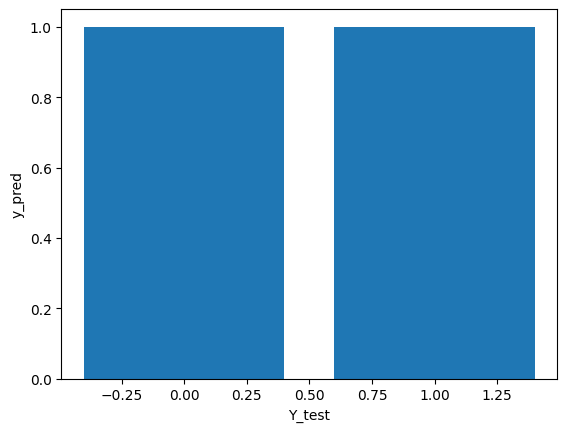

In [16]:
#show bi classification graph

py.bar(Y_test, y_pred)

py.xlabel("Y_test")
py.ylabel("y_pred")
py.plot()
py.show()

In [17]:
def predict_email(email_text):
    """
    Takes a raw email text string and predicts if it's spam or ham.

    Args:
    email_text (str): The content of the email.

    Returns:
    None: Prints the prediction directly.
    """
    # 1. Transform the new email text using the SAME TF-IDF vectorizer
    # The input to transform must be an iterable (like a list), so we put email_text in a list
    email_tfidf = trdf.transform([email_text])

    # 2. Predict using the trained Naive Bayes model
    prediction_code = model.predict(email_tfidf)[0]

    # 3. Print the result
    print(f"Email Text: \"{email_text[:80]}...\"") # Print a snippet of the email
    if prediction_code == 1:
        print("Prediction: 🚨 SPAM 🚨")
    else:
        print("Prediction: ✅ HAM (Not Spam) ✅")
    print("-" * 30)


# --- Let's Test Our System! ---

# Example 1: A clear spam email
spam_example = "Congratulations! You've won a $1,000,000 lottery. Click here to claim your prize now and get a free iPhone."
predict_email(spam_example)

# Example 2: A typical legitimate email
ham_example = "Hi team, please find the attached report for our Q3 sales. Let's discuss it in our meeting tomorrow. Thanks."
predict_email(ham_example)

# Example 3: A more subtle spam email
subtle_spam_example = "Your account requires immediate attention. Please verify your login details by clicking the link to avoid suspension."
predict_email(subtle_spam_example)


Email Text: "Congratulations! You've won a $1,000,000 lottery. Click here to claim your prize..."
Prediction: 🚨 SPAM 🚨
------------------------------
Email Text: "Hi team, please find the attached report for our Q3 sales. Let's discuss it in o..."
Prediction: ✅ HAM (Not Spam) ✅
------------------------------
Email Text: "Your account requires immediate attention. Please verify your login details by c..."
Prediction: 🚨 SPAM 🚨
------------------------------


In [18]:
import pickle

# Save the TF-IDF vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(trdf, f)

# Save the trained Naive Bayes model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Vectorizer and model have been saved to 'vectorizer.pkl' and 'model.pkl'")

Vectorizer and model have been saved to 'vectorizer.pkl' and 'model.pkl'
